<a href="https://colab.research.google.com/github/ameydbharambe/Phishing-Detection/blob/main/PhishingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
class URLDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.url_embeddings = embeddings

        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.url_embeddings)

    def __getitem__(self, idx):
        url_tensor = self.url_embeddings[idx]

        return url_tensor, self.labels[idx]

In [ ]:




myfile = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
# importing the csv library
import csv

# opening the csv file by specifying
# the location
# with the variable name as csv_file
with open('PhiUSIIL_Phishing_URL_Dataset.csv') as csv_file:

    # creating an object of csv reader
    # with the delimiter as ,
    csv_reader = csv.reader(csv_file, delimiter = ',')

    # list to store the names of columns
    list_of_column_names = []

    # loop to iterate through the rows of csv
    for row in csv_reader:

        # adding the first row
        list_of_column_names.append(row)

        # breaking the loop after the
        # first iteration itself
        break

In [ ]:
selected_features = myfile[['URL', 'URLLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL',
'DomainLength', 'IsDomainIP', 'TLD', 'TLDLegitimateProb', 'IsHTTPS', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'URLSimilarityIndex', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet',
                            'HasPasswordField', 'label', 'Domain']]
selected_features.drop_duplicates(subset='Domain')



,URL,URLLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,...,URLSimilarityIndex,DomainTitleMatchScore,URLTitleMatchScore,HasTitle,HasFavicon,HasExternalFormSubmit,HasSocialNet,HasPasswordField,label,Domain
0,https://www.southbankmosaics.com,31,1,0,0,0.0,18,0.581,0,0.0,...,100.0,0.000000,0.000000,1,0,0,0,0,1,www.southbankmosaics.com
1,https://www.uni-mainz.de,23,1,0,0,0.0,9,0.391,0,0.0,...,100.0,55.555556,55.555556,1,1,0,1,0,1,www.uni-mainz.de
2,https://www.voicefmradio.co.uk,29,2,0,0,0.0,15,0.517,0,0.0,...,100.0,46.666667,46.666667,1,0,0,0,0,1,www.voicefmradio.co.uk
3,https://www.sfnmjournal.com,26,1,0,0,0.0,13,0.500,0,0.0,...,100.0,0.000000,0.000000,1,0,0,1,0,1,www.sfnmjournal.com
4,https://www.rewildingargentina.org,33,1,0,0,0.0,20,0.606,0,0.0,...,100.0,100.000000,100.000000,1,0,0,1,0,1,www.rewildingargentina.org
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235789,https://www.life-in-ecuador.com,30,1,0,0,0.0,15,0.500,0,0.0,...,100.0,100.000000,100.000000,1,1,0,1,0,1,www.life-in-ecuador.com
235790,https://www.skincareliving.com,29,1,0,0,0.0,16,0.552,0,0.0,...,100.0,100.000000,100.000000,1,1,0,1,0,1,www.skincareliving.com
235791,https://www.winchester.gov.uk,28,2,0,0,0.0,14,0.500,0,0.0,...,100.0,0.000000,0.000000,1,1,0,1,0,1,www.winchester.gov.uk
235792,https://www.nononsensedesign.be,30,1,0,0,0.0,17,0.567,0,0.0,...,100.0,100.000000,100.000000,1,1,0,1,0,1,www.nononsensedesign.be


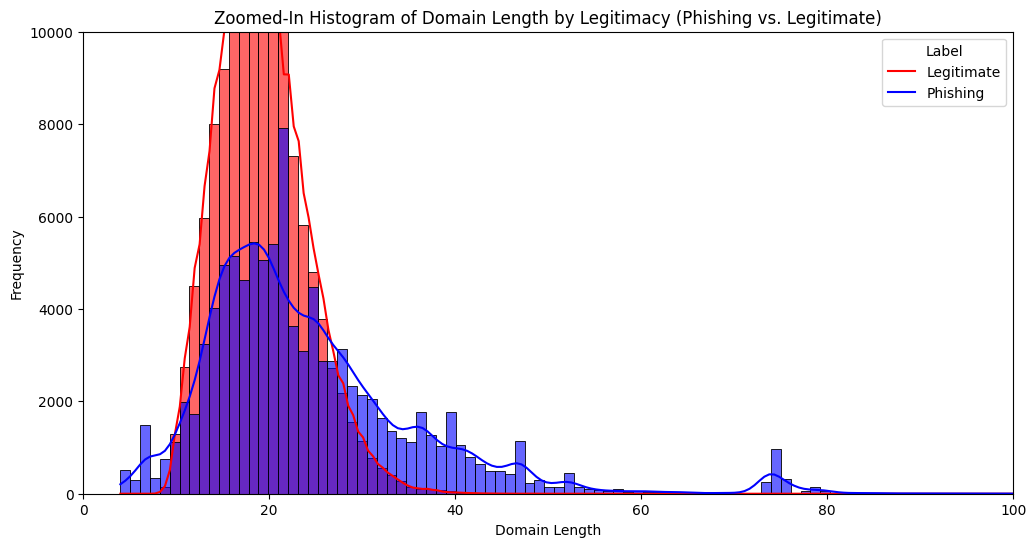

In [ ]:


# Plot the histogram with Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(
    data=selected_features,
    x="DomainLength",
    hue="label",
    kde=True,
    palette={0: "blue", 1: "red"},
    bins=100,  # More bins for detail
    alpha=0.6
)

# Zoom in on a specific URL length range (e.g., between 0 and 1000)
plt.xlim(0, 100)  # Adjust x-axis range
plt.ylim(0, 10000)    # Adjust y-axis range if needed (optional)

plt.title("Zoomed-In Histogram of Domain Length by Legitimacy (Phishing vs. Legitimate)")
plt.xlabel("Domain Length")
plt.ylabel("Frequency")
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

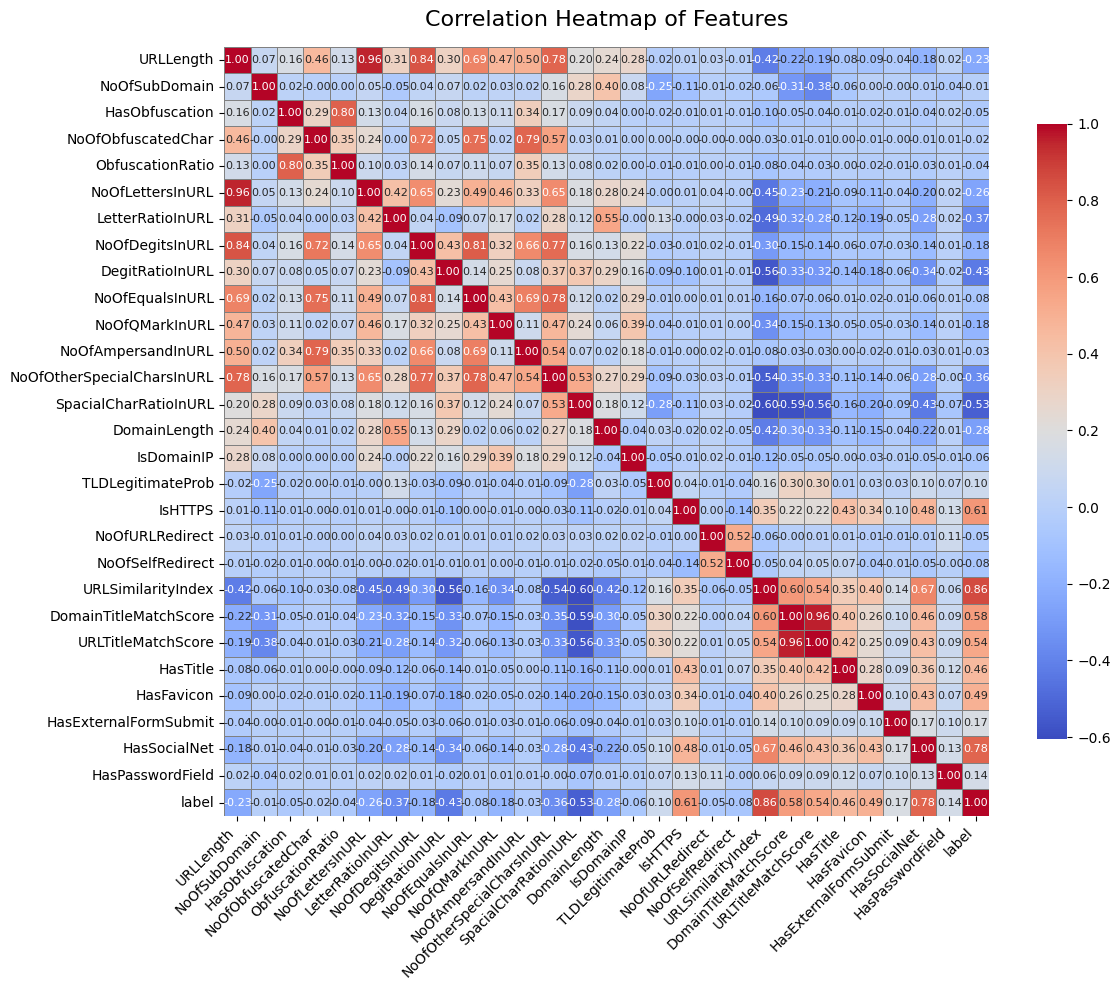

In [ ]:


# Example DataFrame
# df = pd.read_csv("your_dataset.csv")  # Load your dataset

# Calculating correlations
numeric_df = selected_features.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()

# Creating a more readable heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    fmt=".2f",            # Format numbers to 2 decimal places
    cmap="coolwarm",      # Adjust color palette for better readability
    linewidths=0.5,       # Add grid lines
    linecolor="gray",     # Grid line color
    annot_kws={"size": 8}, # Set annotation font size
    cbar_kws={"shrink": 0.8}  # Shrink color bar for better fit
)
plt.title("Correlation Heatmap of Features", fontsize=16, pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=10)                           # Adjust y-axis font size
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [ ]:


# Create a sample DataFrame
df = pd.DataFrame(selected_features)

final_features = df[["Domain", "IsHTTPS", "SpacialCharRatioInURL", "DegitRatioInURL", "LetterRatioInURL", "DomainLength", "HasObfuscation", "HasSocialNet", "label", "NoOfQMarkInURL", "NoOfSubDomain"]]
final_features.drop_duplicates(subset='Domain')

,Domain,IsHTTPS,SpacialCharRatioInURL,DegitRatioInURL,LetterRatioInURL,DomainLength,HasObfuscation,HasSocialNet,label,NoOfQMarkInURL,NoOfSubDomain
0,www.southbankmosaics.com,1,0.032,0.0,0.581,24,0,0,1,0,1
1,www.uni-mainz.de,1,0.087,0.0,0.391,16,0,1,1,0,1
2,www.voicefmradio.co.uk,1,0.069,0.0,0.517,22,0,0,1,0,2
3,www.sfnmjournal.com,1,0.038,0.0,0.500,19,0,1,1,0,1
4,www.rewildingargentina.org,1,0.030,0.0,0.606,26,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
235789,www.life-in-ecuador.com,1,0.100,0.0,0.500,23,0,1,1,0,1
235790,www.skincareliving.com,1,0.034,0.0,0.552,22,0,1,1,0,1
235791,www.winchester.gov.uk,1,0.071,0.0,0.500,21,0,1,1,0,2
235792,www.nononsensedesign.be,1,0.033,0.0,0.567,23,0,1,1,0,1


235795

In [ ]:
pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
urls = final_features['Domain']

encoder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = encoder.encode(urls)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:

X = embeddings  # All additional features
y = final_features['label'].values  # Target variable)
len(embeddings[1])

384

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
train_dataset = URLDataset(X_train, y_train)
print(len(train_dataset))
test_dataset = URLDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size = 1024, shuffle=True)
print(len(train_loader))
test_loader = DataLoader(test_dataset, batch_size=1024)

188636
185


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

KeyboardInterrupt: 

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     20189
           1       0.82      0.98      0.89     26970

    accuracy                           0.86     47159
   macro avg       0.89      0.85      0.85     47159
weighted avg       0.88      0.86      0.86     47159



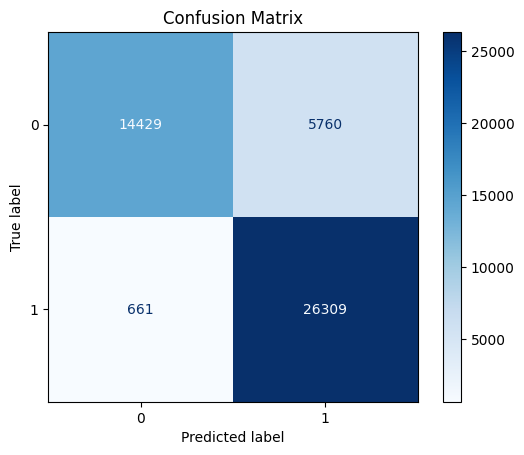

0.8638435929515045


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

## Creating a Neural Network

We focused initially with our basis model of logistic to understand a near linear relationship between the phishing and embedding categories. So, we use this to create more accurate model to perform this task

In [ ]:
class URLClassifier(nn.Module):
    def __init__(self):
        super(URLClassifier, self).__init__()
        self.fc1 = nn.Linear(384, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 64)
        self.fc7 = nn.Linear(64, 64)
        self.fc8 = nn.Linear(64, 32)
        self.fc9 = nn.Linear(32, 16)
        self.fc10 = nn.Linear(16, 4)
        self.fc11 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):


        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.relu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.relu(self.fc8(x))
        x = self.relu(self.fc9(x))
        x = self.relu(self.fc10(x))
        x = self.sigmoid(self.fc11(x))
        return x

AttributeError: 'Series' object has no attribute 'cuda'

In [ ]:
model = URLClassifier()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
training_loss = []
epochs = 200
# Training Loop
def train_model(model, train_loader, epochs=epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for urls, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(urls)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        average_loss = total_loss/len(train_loader)  # Compute the average loss
        training_loss.append(average_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {average_loss:.4f}")

train_model(model, train_loader)

Epoch [1/200], Loss: 0.4420
Epoch [2/200], Loss: 0.3170
Epoch [3/200], Loss: 0.3039
Epoch [4/200], Loss: 0.2941
Epoch [5/200], Loss: 0.2849
Epoch [6/200], Loss: 0.2788
Epoch [7/200], Loss: 0.2730
Epoch [8/200], Loss: 0.2695
Epoch [9/200], Loss: 0.2644
Epoch [10/200], Loss: 0.2589
Epoch [11/200], Loss: 0.2555
Epoch [12/200], Loss: 0.2502
Epoch [13/200], Loss: 0.2468
Epoch [14/200], Loss: 0.2419
Epoch [15/200], Loss: 0.2363
Epoch [16/200], Loss: 0.2315
Epoch [17/200], Loss: 0.2273
Epoch [18/200], Loss: 0.2235
Epoch [19/200], Loss: 0.2184
Epoch [20/200], Loss: 0.2134
Epoch [21/200], Loss: 0.2082
Epoch [22/200], Loss: 0.2027
Epoch [23/200], Loss: 0.1975
Epoch [24/200], Loss: 0.1925
Epoch [25/200], Loss: 0.1901
Epoch [26/200], Loss: 0.1844
Epoch [27/200], Loss: 0.1803
Epoch [28/200], Loss: 0.1759
Epoch [29/200], Loss: 0.1704
Epoch [30/200], Loss: 0.1681
Epoch [31/200], Loss: 0.1623
Epoch [32/200], Loss: 0.1588
Epoch [33/200], Loss: 0.1538
Epoch [34/200], Loss: 0.1510
Epoch [35/200], Loss: 0

In [ ]:
test_loss = []
def test_model(model, train_loader, epochs=epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for urls, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(urls)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        average_loss = total_loss/len(train_loader)  # Compute the average loss
        test_loss.append(average_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {average_loss:.4f}")

test_model(model, test_loader)

Epoch [1/200], Loss: 0.4272
Epoch [2/200], Loss: 0.2817
Epoch [3/200], Loss: 0.2735
Epoch [4/200], Loss: 0.2673
Epoch [5/200], Loss: 0.2618
Epoch [6/200], Loss: 0.2565
Epoch [7/200], Loss: 0.2511
Epoch [8/200], Loss: 0.2457
Epoch [9/200], Loss: 0.2402
Epoch [10/200], Loss: 0.2346
Epoch [11/200], Loss: 0.2292
Epoch [12/200], Loss: 0.2240
Epoch [13/200], Loss: 0.2191
Epoch [14/200], Loss: 0.2149
Epoch [15/200], Loss: 0.2164
Epoch [16/200], Loss: 0.2151
Epoch [17/200], Loss: 0.2080
Epoch [18/200], Loss: 0.2040
Epoch [19/200], Loss: 0.2122
Epoch [20/200], Loss: 0.2087
Epoch [21/200], Loss: 0.1890
Epoch [22/200], Loss: 0.1743
Epoch [23/200], Loss: 0.1656
Epoch [24/200], Loss: 0.1621
Epoch [25/200], Loss: 0.1646
Epoch [26/200], Loss: 0.1668
Epoch [27/200], Loss: 0.1696
Epoch [28/200], Loss: 0.1559
Epoch [29/200], Loss: 0.1257
Epoch [30/200], Loss: 0.1045
Epoch [31/200], Loss: 0.0915
Epoch [32/200], Loss: 0.0867
Epoch [33/200], Loss: 0.0904
Epoch [34/200], Loss: 0.0935
Epoch [35/200], Loss: 0

Test Accuracy: 1.00
Confusion Matrix:
[[20150    39]
 [   34 26936]]


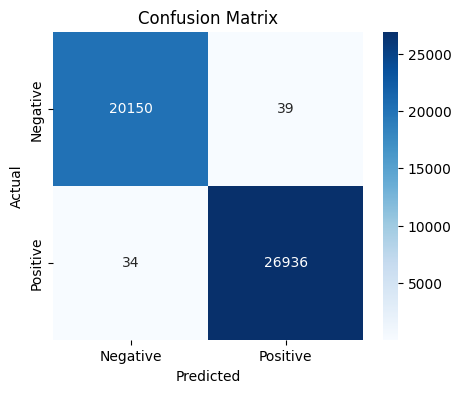

(np.float64(0.9984520452087619),
 array([[20150,    39],
        [   34, 26936]]))

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
all_preds = []
all_labels = []
probability = []

def evaluate(model, test_loader):
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # No gradients needed during evaluation
        for urls, labels in test_loader:
            outputs = model(urls)
            predictions = (outputs >= 0.5).float()  # Convert logits to binary (0 or 1)
            probability.extend(outputs)
            all_preds.extend(predictions.cpu().numpy().flatten())  # Collect predictions
            all_labels.extend(labels.cpu().numpy().flatten())  # Collect true labels

    # Compute Accuracy
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f"Test Accuracy: {accuracy:.2f}")

    # Compute Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, cm

# Call this function after training:
evaluate(model, test_loader)


In [ ]:
'''from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_pr_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, marker='.', label="Model")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()
plot_pr_curve(all_labels, all_preds)'''

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_pr_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'AP = {ap:.2f}', marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()
plot_pr_curve(all_labels, probability)


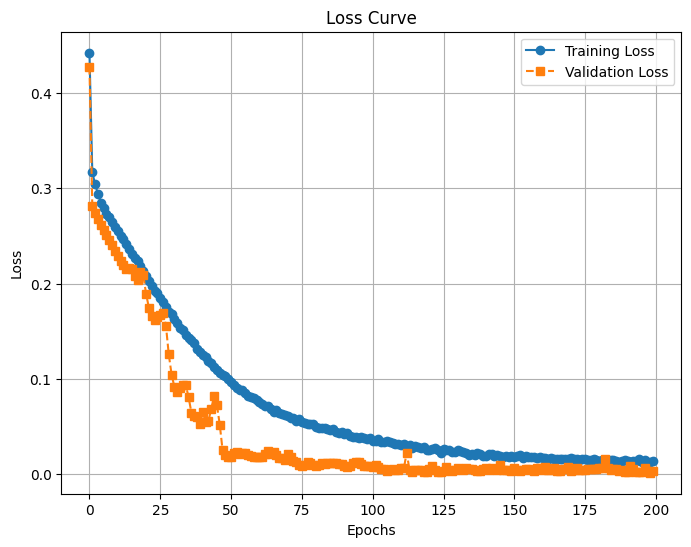

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(train_losses, val_losses=None):
    """
    Plots the training loss curve. Optionally, includes validation loss.

    Parameters:
    - train_losses (list): List of training loss values per epoch.
    - val_losses (list, optional): List of validation loss values per epoch.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(train_losses, label="Training Loss", marker='o', linestyle='-')

    if val_losses:
        plt.plot(val_losses, label="Validation Loss", marker='s', linestyle='--')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
# Assuming train_losses and val_losses are lists storing loss per epoch

plot_loss_curve(training_loss, test_loss)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import torch

def calculate_metrics(model, test_loader, device='cpu'):
    model.eval()  # Evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)

            # Binary classification: use threshold
            if outputs.shape[1] == 1 or len(outputs.shape) == 1:
                predictions = (outputs >= 0.5).float()
            else:  # Multi-class classification
                predictions = torch.argmax(outputs, dim=1)

            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Precision, Recall, F1
    precision = precision_score(all_labels, all_preds, average='binary')  # or 'macro', 'micro' for multi-class
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Example usage:
calculate_metrics(model, test_loader, device='cpu')



Precision: 0.9910
Recall: 0.9814
F1 Score: 0.9862
